# <div style="text-align:center; padding:15px; color:white; margin:0; font-size:150%; font-family:'Times New Roman'; background-color:#6A0977; overflow:hidden"><b>Import libraries and load data</b></div>


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


df=pd.read_csv("/kaggle/input/mobile-device-usage-and-user-behavior-dataset/user_behavior_dataset.csv")
print(df.info())
print(df.isnull().sum())
print(df.head(15))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB
None
User ID                       0
Device Model                  0
Operating System      

# <div style="text-align:center; padding:15px; color:white; margin:0; font-size:150%; font-family:'Times New Roman'; background-color:#6A0977; overflow:hidden"><b>Univariate Analysis</b>
</div>




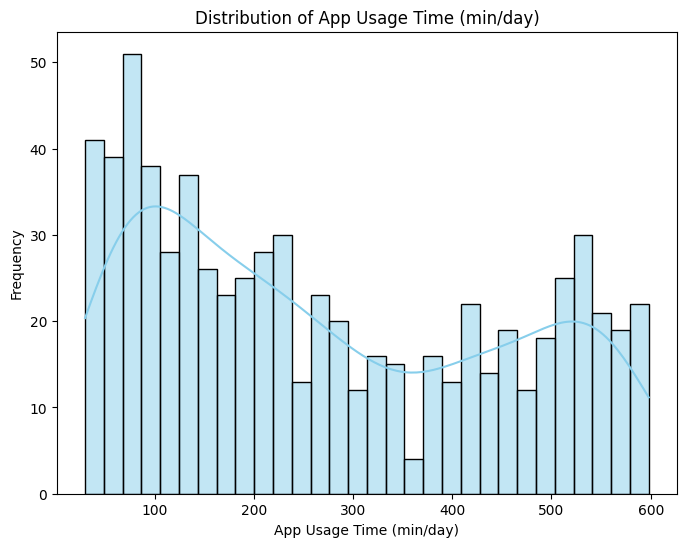

In [2]:
plt.figure(figsize=(8, 6))
sns.histplot(df['App Usage Time (min/day)'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of App Usage Time (min/day)')
plt.xlabel('App Usage Time (min/day)')
plt.ylabel('Frequency')
plt.show()


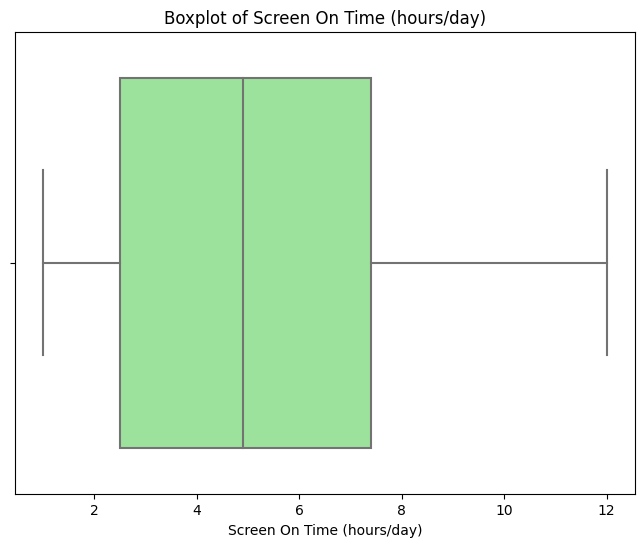

In [3]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Screen On Time (hours/day)'], color='lightgreen')
plt.title('Boxplot of Screen On Time (hours/day)')
plt.xlabel('Screen On Time (hours/day)')
plt.show()


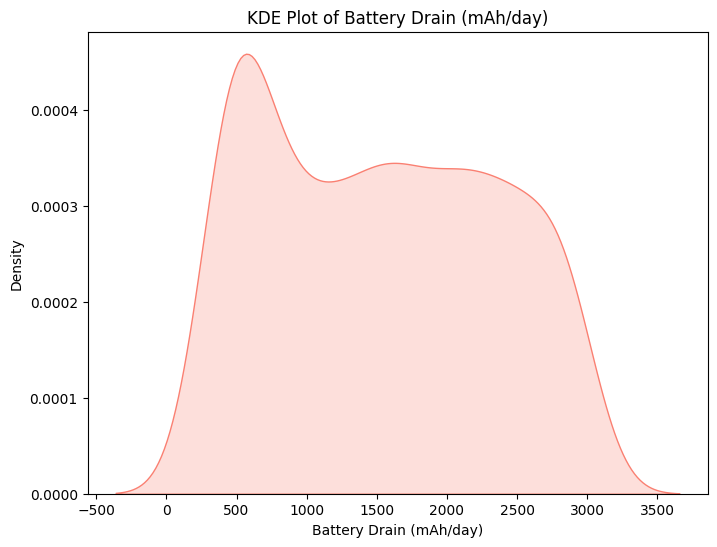

In [4]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Battery Drain (mAh/day)'], shade=True, color='salmon')
plt.title('KDE Plot of Battery Drain (mAh/day)')
plt.xlabel('Battery Drain (mAh/day)')
plt.ylabel('Density')
plt.show()


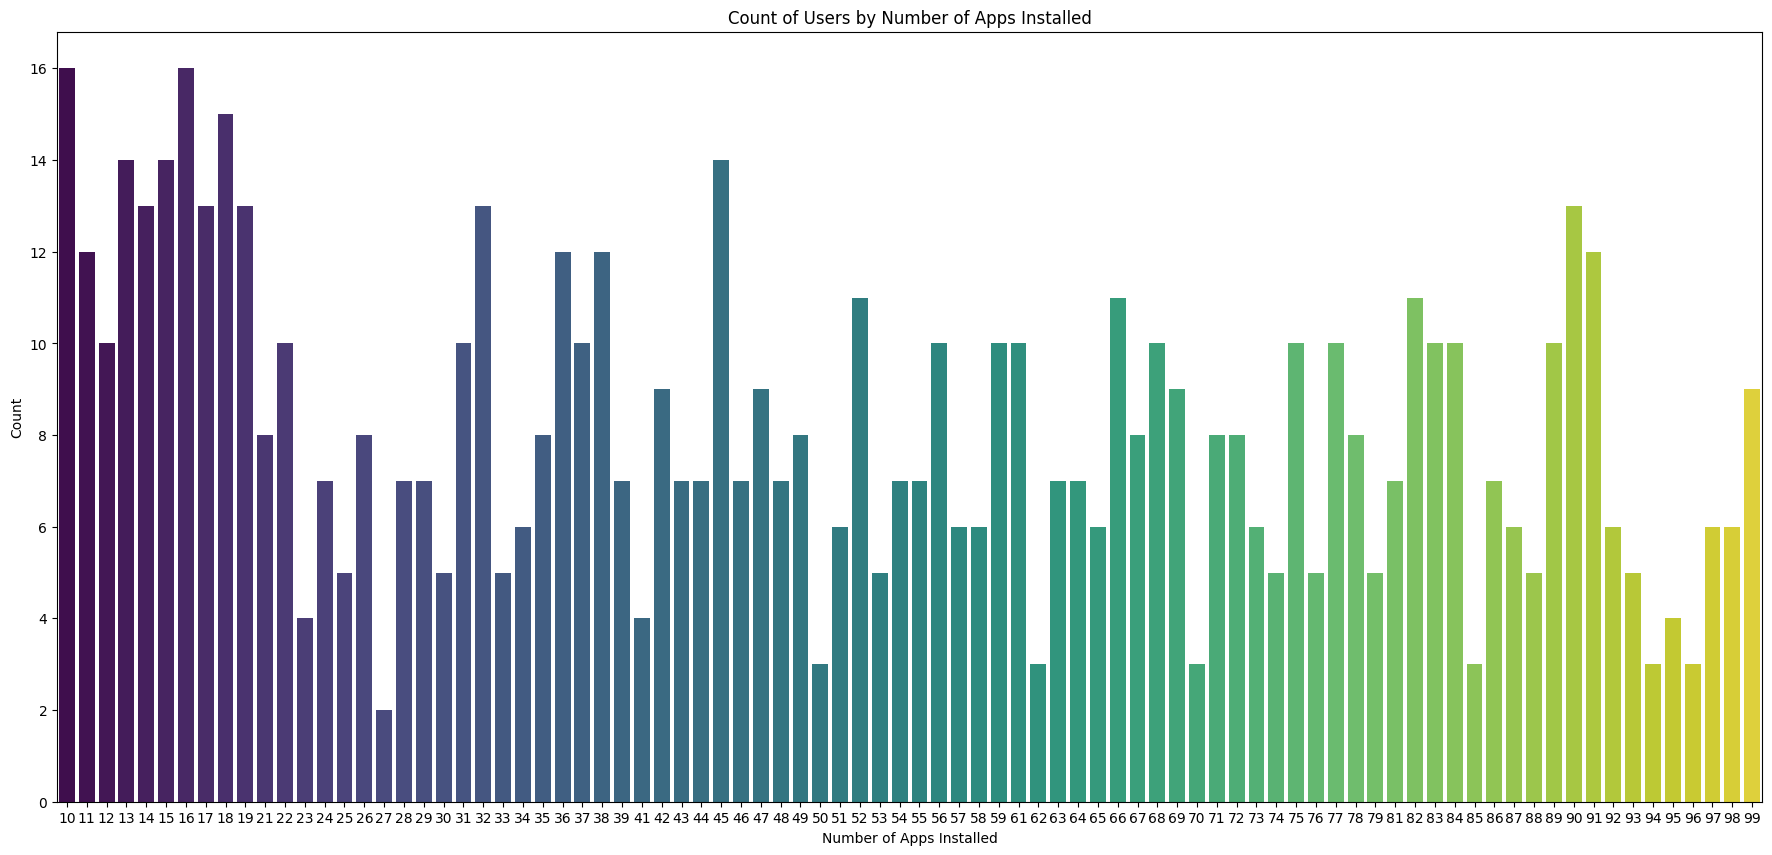

In [5]:
plt.figure(figsize=(22, 10))
sns.countplot(x='Number of Apps Installed', data=df, palette='viridis')
plt.title('Count of Users by Number of Apps Installed')
plt.xlabel('Number of Apps Installed')
plt.ylabel('Count')
plt.show()


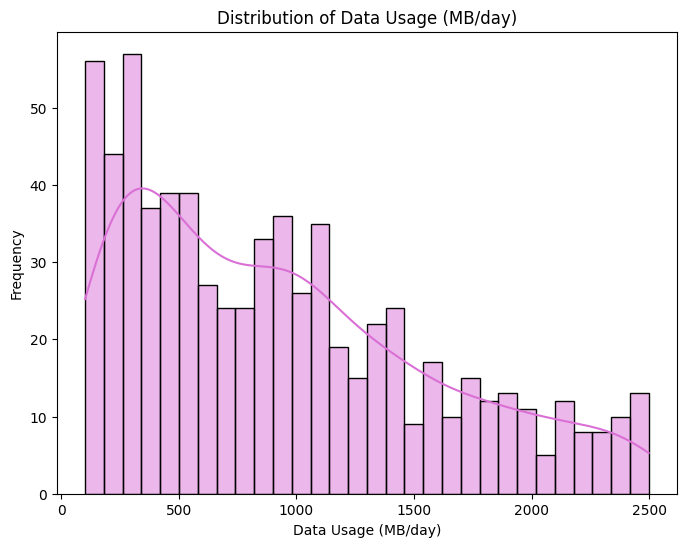

In [6]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Data Usage (MB/day)'], bins=30, color='orchid', kde=True)
plt.title('Distribution of Data Usage (MB/day)')
plt.xlabel('Data Usage (MB/day)')
plt.ylabel('Frequency')
plt.show()


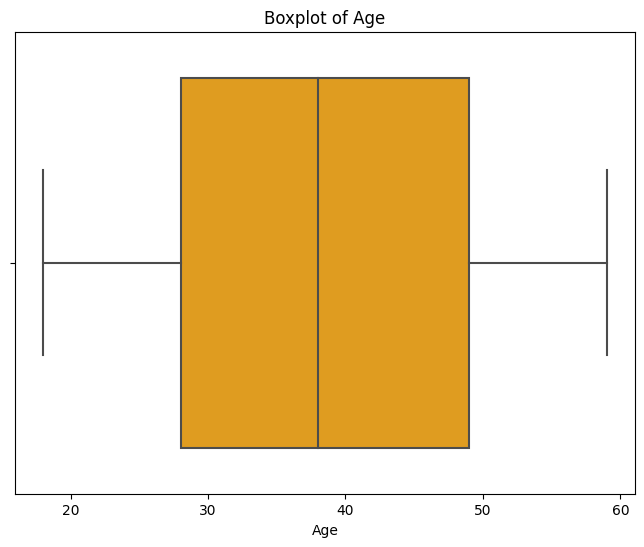

In [7]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Age'], color='orange')
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()


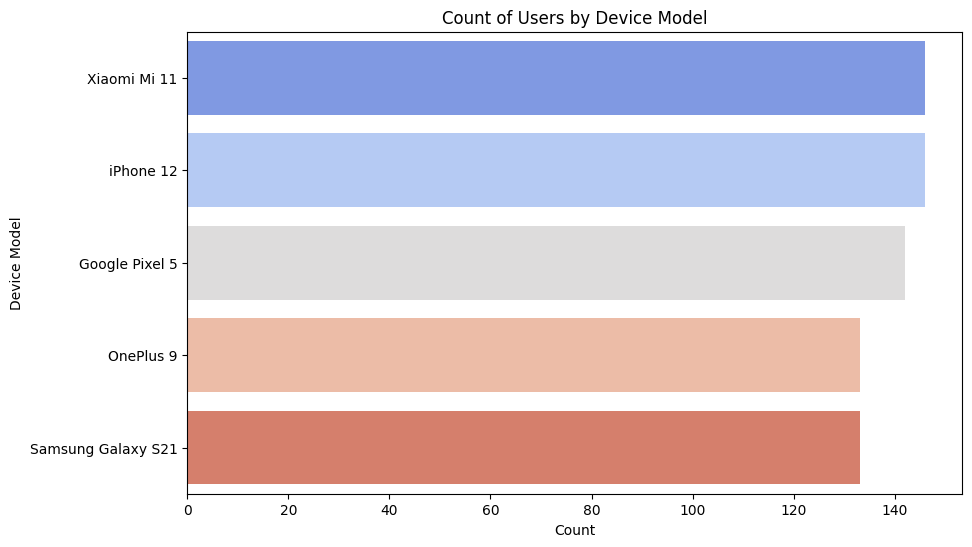

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Device Model', data=df, order=df['Device Model'].value_counts().index, palette='coolwarm')
plt.title('Count of Users by Device Model')
plt.xlabel('Count')
plt.ylabel('Device Model')
plt.show()


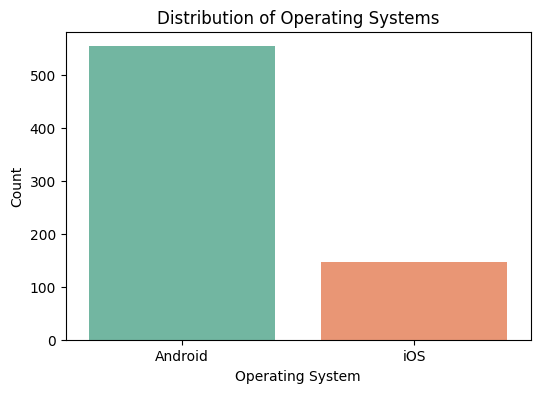

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Operating System', data=df, palette='Set2')
plt.title('Distribution of Operating Systems')
plt.xlabel('Operating System')
plt.ylabel('Count')
plt.show()


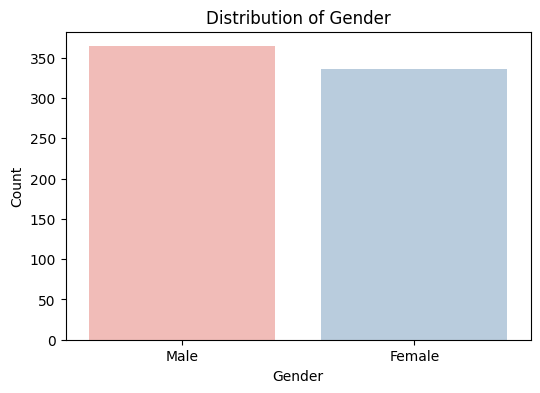

In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df, palette='Pastel1')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


# <div style="text-align:center; padding:15px; color:white; margin:0; font-size:150%; font-family:'Times New Roman'; background-color:#6A0977; overflow:hidden"><b>Bivariate Analysis</b></div>



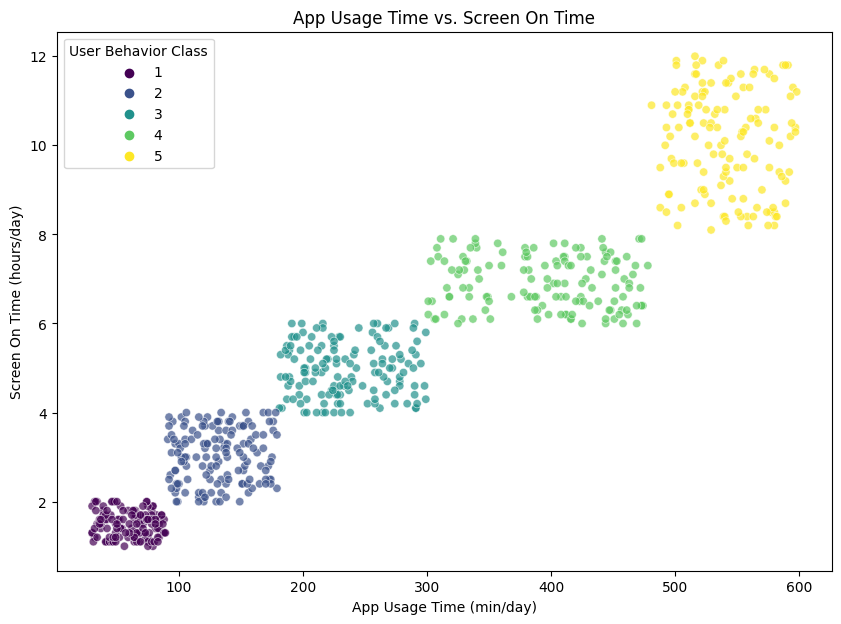

In [11]:
df.columns = df.columns.str.strip()
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df,
    x='App Usage Time (min/day)', 
    y='Screen On Time (hours/day)', 
    hue='User Behavior Class', 
    palette='viridis', 
    alpha=0.7
)
plt.title('App Usage Time vs. Screen On Time')
plt.xlabel('App Usage Time (min/day)')
plt.ylabel('Screen On Time (hours/day)')
plt.legend(title='User Behavior Class')
plt.show()

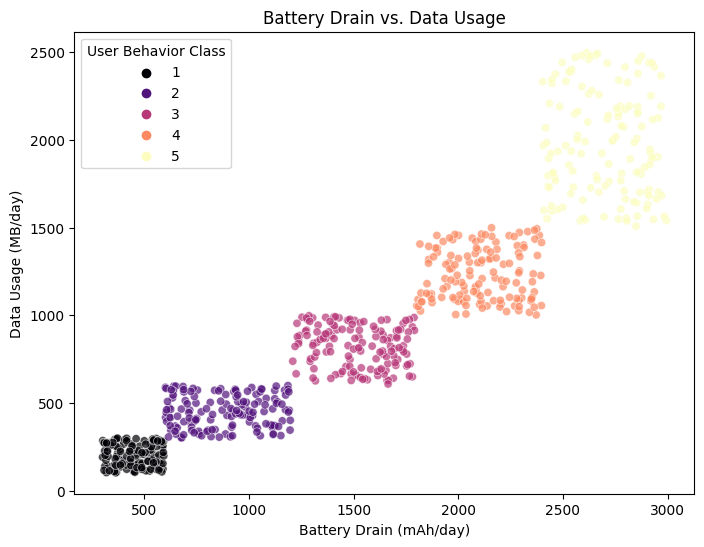

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Battery Drain (mAh/day)', y='Data Usage (MB/day)', hue='User Behavior Class', palette='magma', alpha=0.7)
plt.title('Battery Drain vs. Data Usage')
plt.xlabel('Battery Drain (mAh/day)')
plt.ylabel('Data Usage (MB/day)')
plt.show()

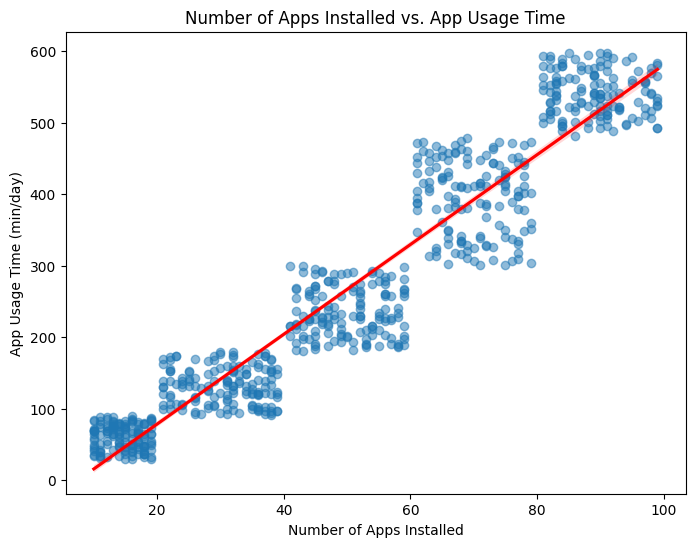

In [13]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Number of Apps Installed', y='App Usage Time (min/day)', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Number of Apps Installed vs. App Usage Time')
plt.xlabel('Number of Apps Installed')
plt.ylabel('App Usage Time (min/day)')
plt.show()


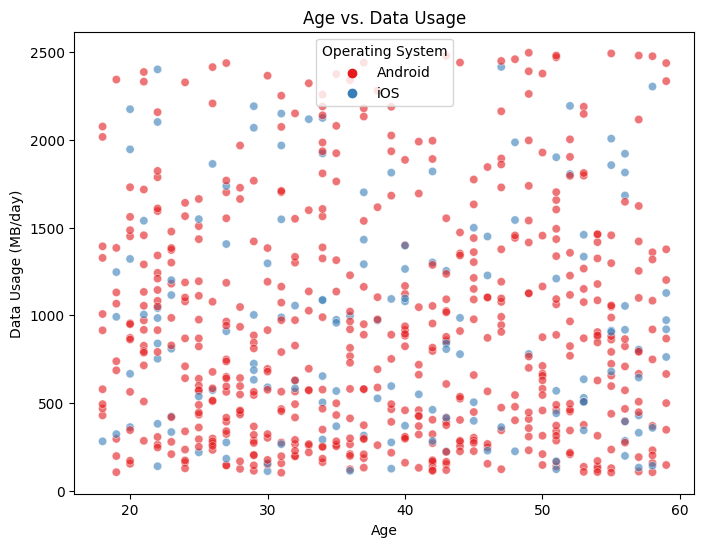

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Data Usage (MB/day)', hue='Operating System', palette='Set1', alpha=0.6)
plt.title('Age vs. Data Usage')
plt.xlabel('Age')
plt.ylabel('Data Usage (MB/day)')
plt.show()


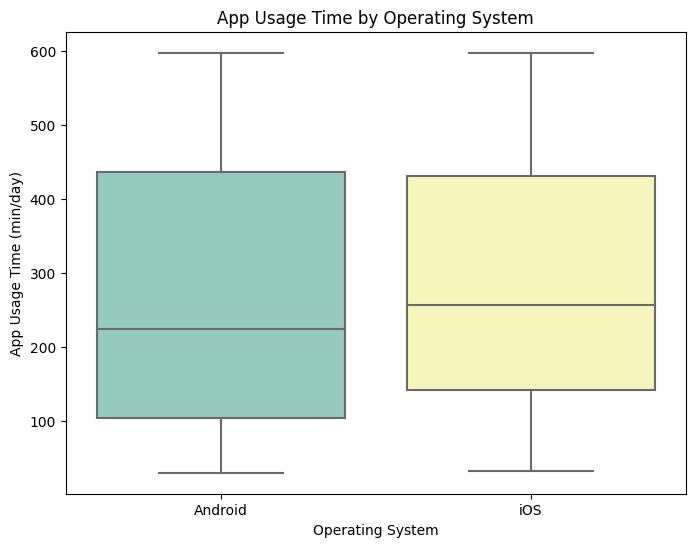

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Operating System', y='App Usage Time (min/day)', data=df, palette='Set3')
plt.title('App Usage Time by Operating System')
plt.xlabel('Operating System')
plt.ylabel('App Usage Time (min/day)')
plt.show()


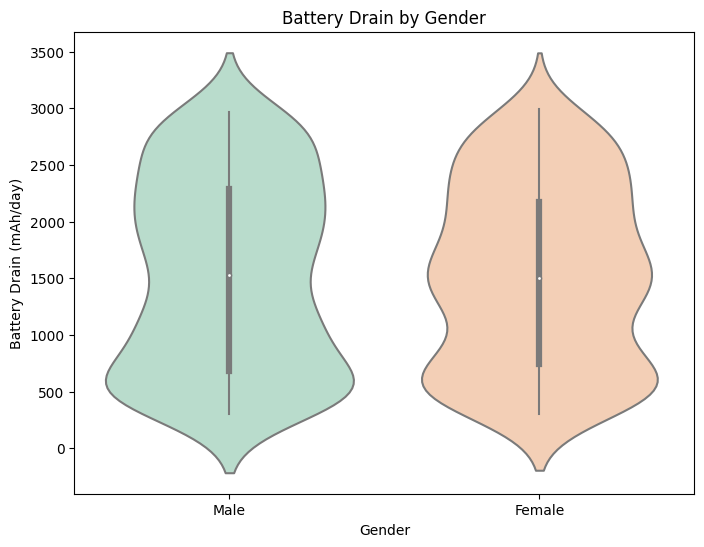

In [16]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Gender', y='Battery Drain (mAh/day)', data=df, palette='Pastel2')
plt.title('Battery Drain by Gender')
plt.xlabel('Gender')
plt.ylabel('Battery Drain (mAh/day)')
plt.show()


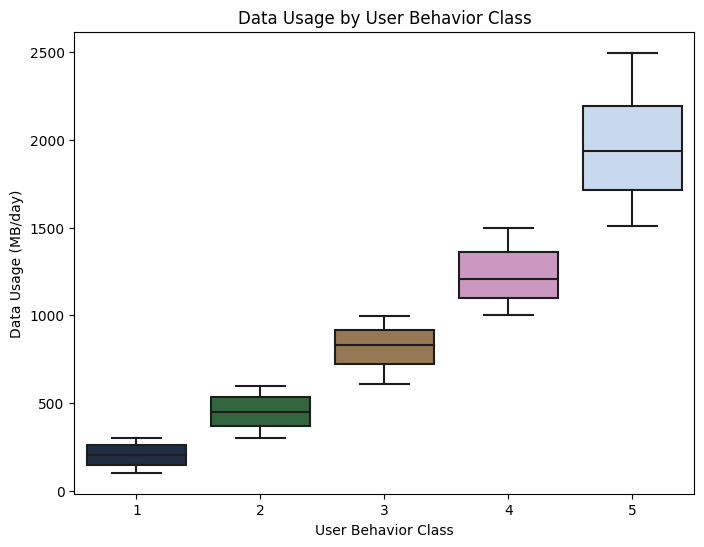

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='User Behavior Class', y='Data Usage (MB/day)', data=df, palette='cubehelix')
plt.title('Data Usage by User Behavior Class')
plt.xlabel('User Behavior Class')
plt.ylabel('Data Usage (MB/day)')
plt.show()


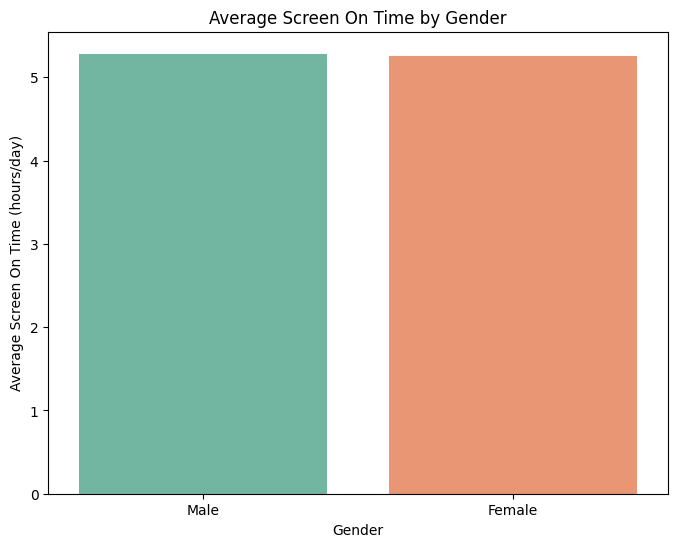

In [18]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Screen On Time (hours/day)', data=df, palette='Set2', ci=None)
plt.title('Average Screen On Time by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Screen On Time (hours/day)')
plt.show()


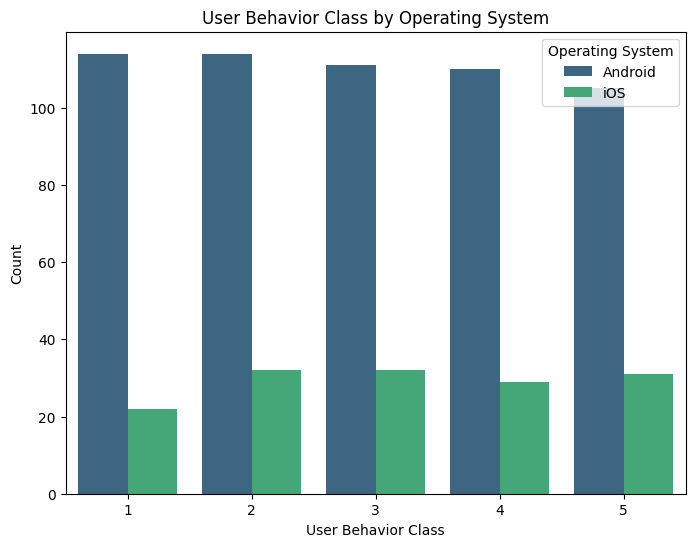

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(x='User Behavior Class', hue='Operating System', data=df, palette='viridis')
plt.title('User Behavior Class by Operating System')
plt.xlabel('User Behavior Class')
plt.ylabel('Count')
plt.legend(title='Operating System')
plt.show()


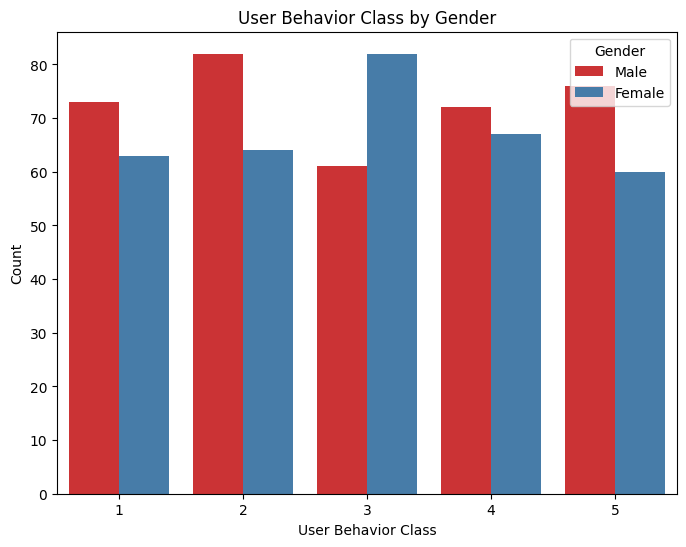

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(x='User Behavior Class', hue='Gender', data=df, palette='Set1')
plt.title('User Behavior Class by Gender')
plt.xlabel('User Behavior Class')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()


# <div style="text-align:center; padding:15px; color:white; margin:0; font-size:150%; font-family:'Times New Roman'; background-color:#6A0977; overflow:hidden"><b>Multivariate Analysis</b></div> 

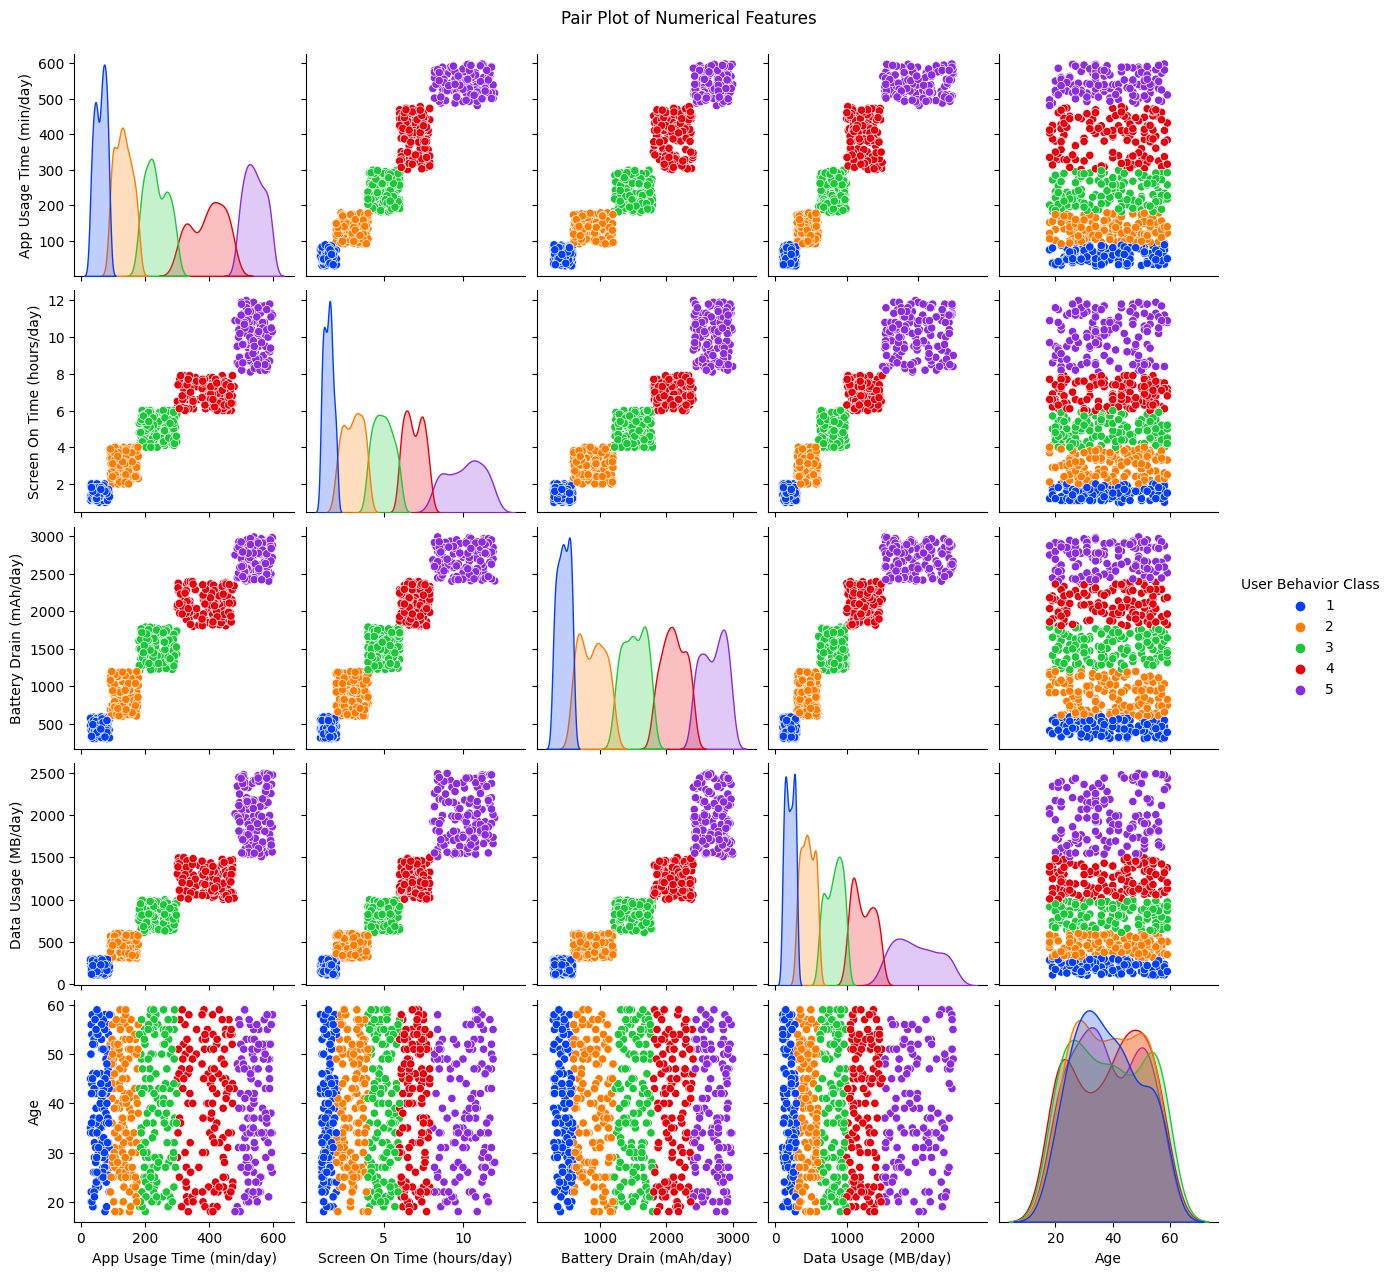

In [21]:
sns.pairplot(df, vars=['App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Battery Drain (mAh/day)', 'Data Usage (MB/day)', 'Age'], hue='User Behavior Class', palette='bright')
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()


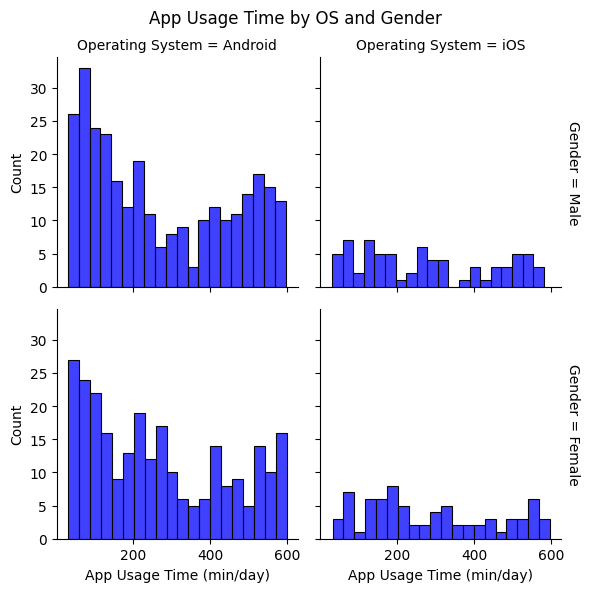

In [22]:
g = sns.FacetGrid(df, col='Operating System', row='Gender', margin_titles=True, palette='Set2')
g.map(sns.histplot, 'App Usage Time (min/day)', bins=20, kde=False, color='blue')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('App Usage Time by OS and Gender')
plt.show()


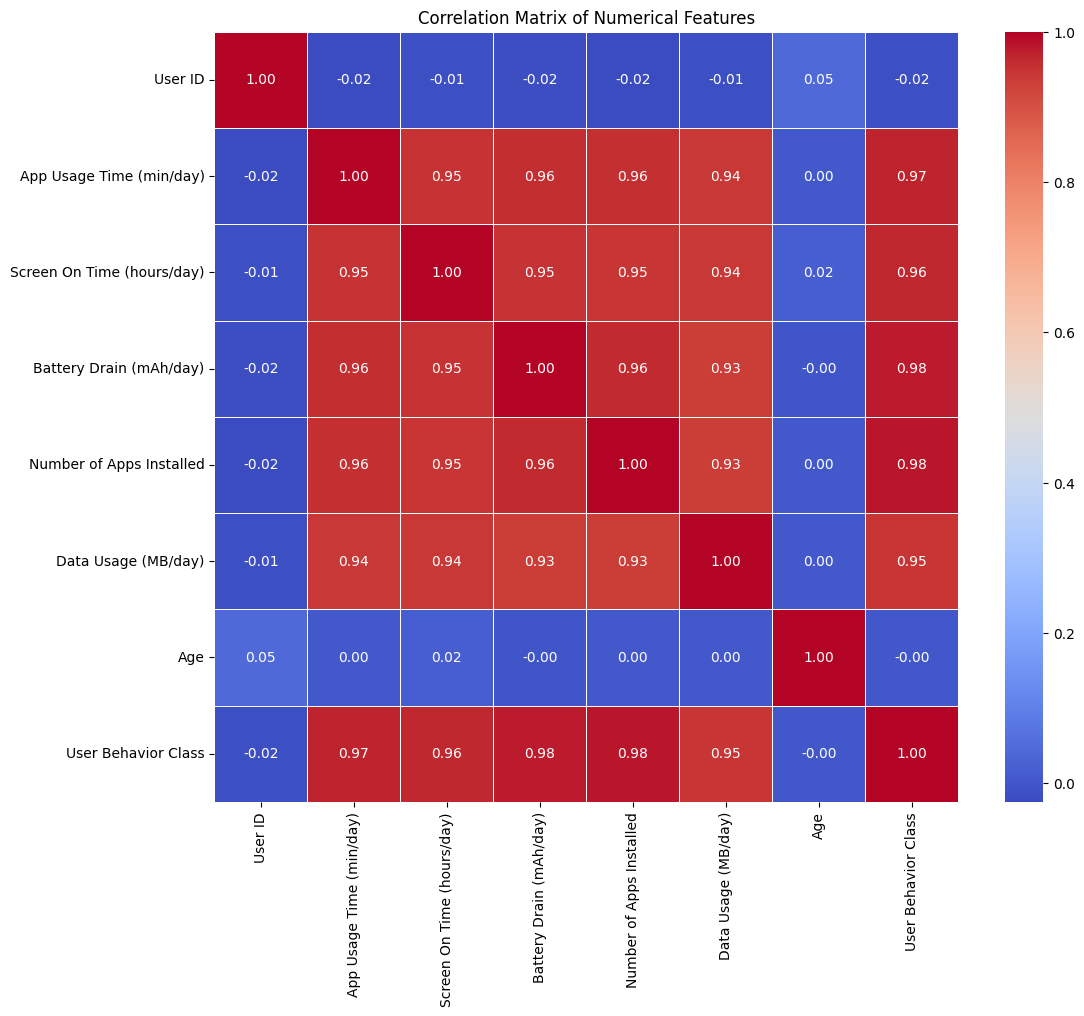

In [23]:
plt.figure(figsize=(12, 10))
corr_matrix = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


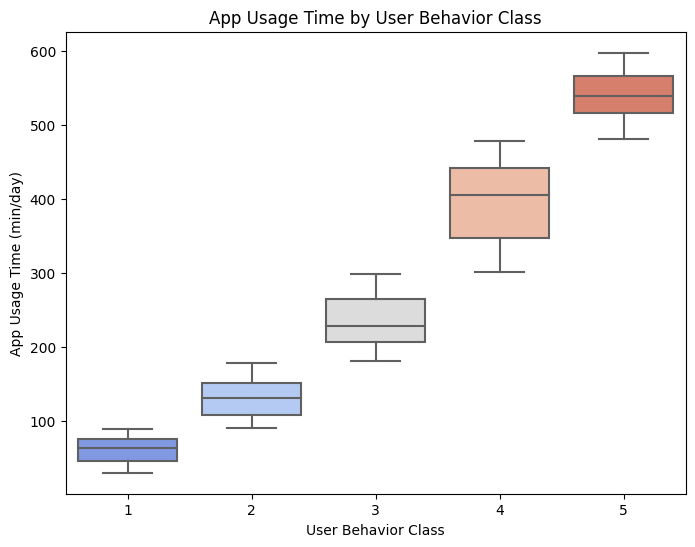

In [24]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='User Behavior Class', y='App Usage Time (min/day)', data=df, palette='coolwarm')
plt.title('App Usage Time by User Behavior Class')
plt.xlabel('User Behavior Class')
plt.ylabel('App Usage Time (min/day)')
plt.show()


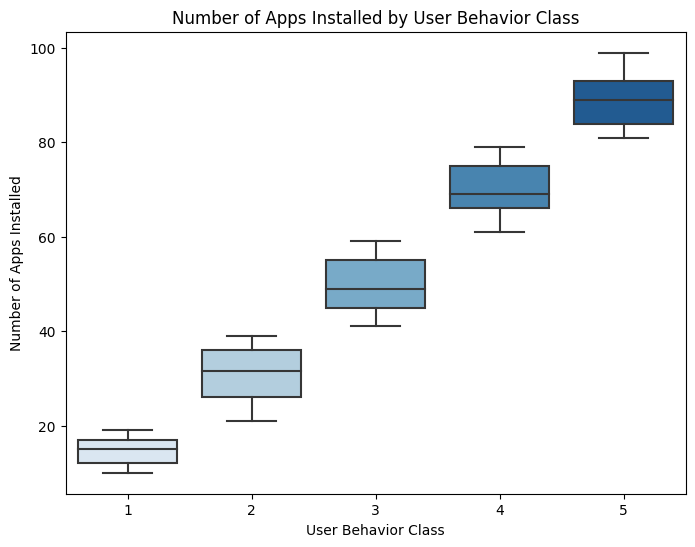

In [25]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='User Behavior Class', y='Number of Apps Installed', data=df, palette='Blues')
plt.title('Number of Apps Installed by User Behavior Class')
plt.xlabel('User Behavior Class')
plt.ylabel('Number of Apps Installed')
plt.show()


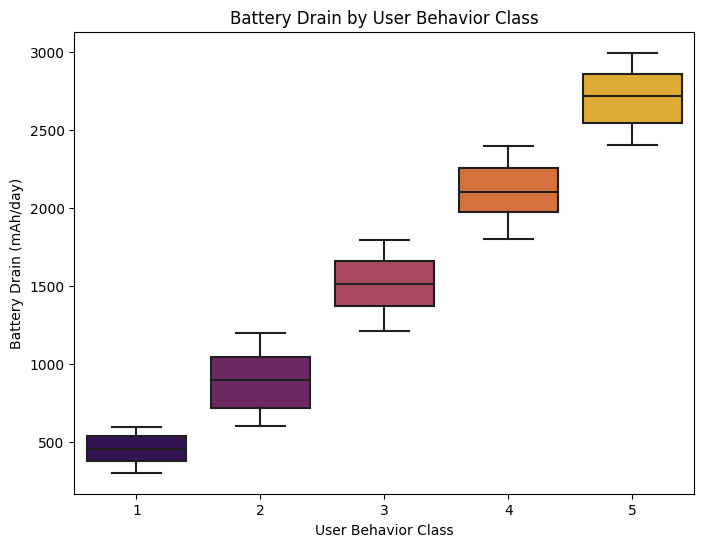

In [26]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='User Behavior Class', y='Battery Drain (mAh/day)', data=df, palette='inferno')
plt.title('Battery Drain by User Behavior Class')
plt.xlabel('User Behavior Class')
plt.ylabel('Battery Drain (mAh/day)')
plt.show()


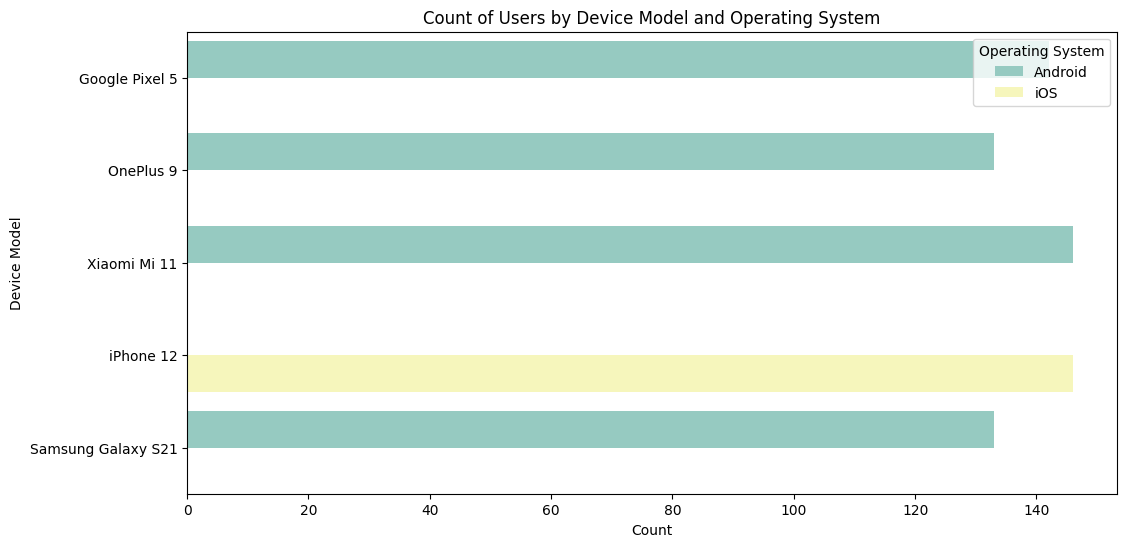

In [27]:
plt.figure(figsize=(12, 6))
sns.countplot(y='Device Model', hue='Operating System', data=df, palette='Set3')
plt.title('Count of Users by Device Model and Operating System')
plt.xlabel('Count')
plt.ylabel('Device Model')
plt.legend(title='Operating System')
plt.show()



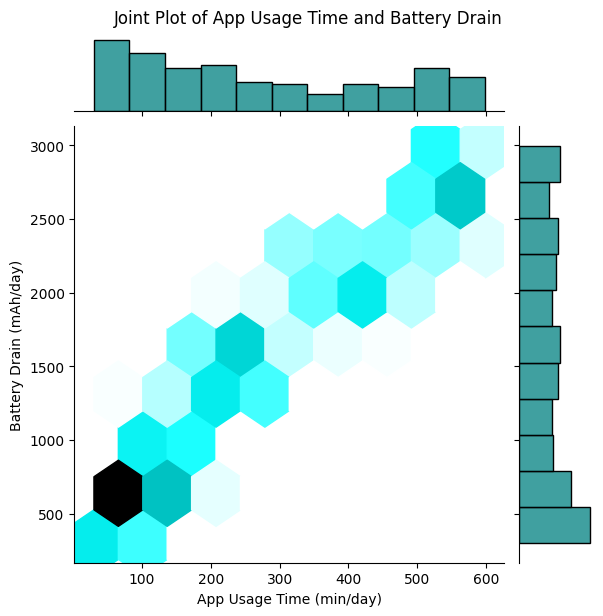

In [28]:
sns.jointplot(x='App Usage Time (min/day)', y='Battery Drain (mAh/day)', data=df, kind='hex', color='teal')
plt.suptitle('Joint Plot of App Usage Time and Battery Drain', y=1.02)
plt.show()


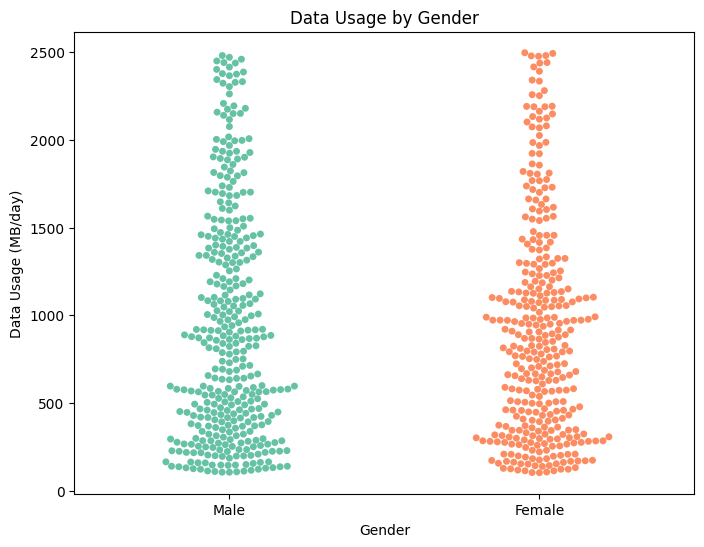

In [29]:
plt.figure(figsize=(8, 6))
sns.swarmplot(x='Gender', y='Data Usage (MB/day)', data=df, palette='Set2')
plt.title('Data Usage by Gender')
plt.xlabel('Gender')
plt.ylabel('Data Usage (MB/day)')
plt.show()


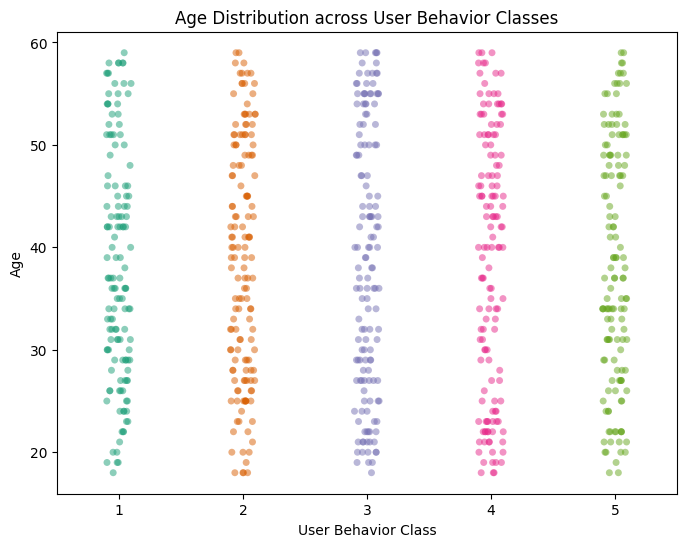

In [30]:
plt.figure(figsize=(8, 6))
sns.stripplot(x='User Behavior Class', y='Age', data=df, jitter=True, alpha=0.5, palette='Dark2')
plt.title('Age Distribution across User Behavior Classes')
plt.xlabel('User Behavior Class')
plt.ylabel('Age')
plt.show()


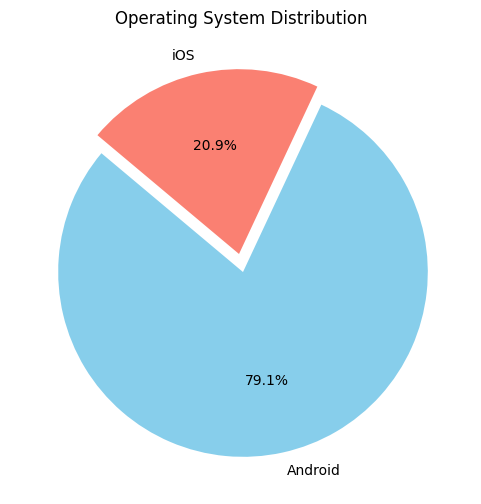

In [31]:
plt.figure(figsize=(6, 6))
df['Operating System'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=140, explode=[0.05, 0.05])
plt.title('Operating System Distribution')
plt.ylabel('')
plt.show()


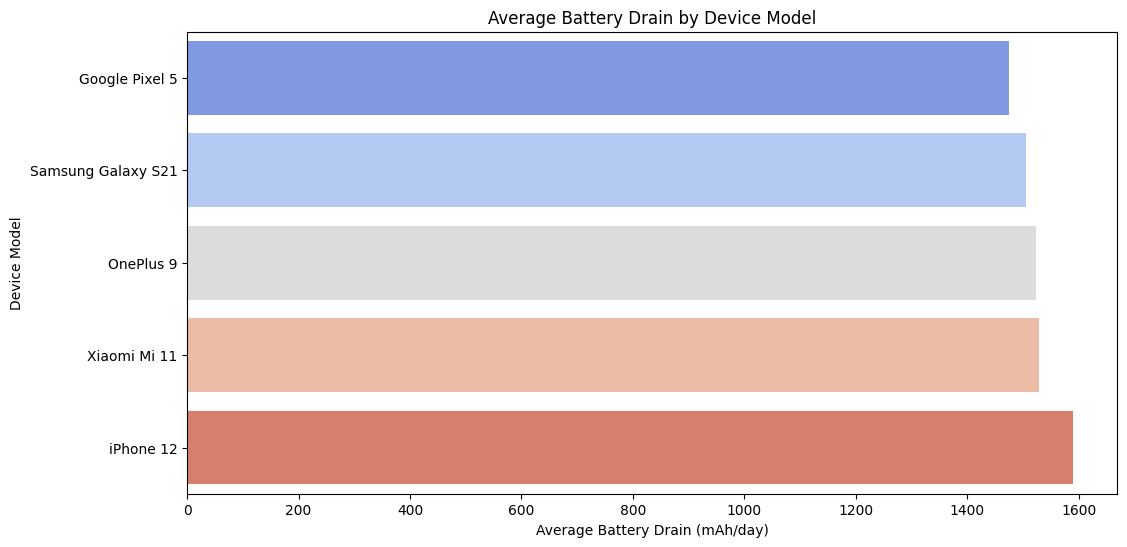

In [32]:
plt.figure(figsize=(12, 6))
avg_battery = df.groupby('Device Model')['Battery Drain (mAh/day)'].mean().sort_values()
sns.barplot(x=avg_battery.values, y=avg_battery.index, palette='coolwarm')
plt.title('Average Battery Drain by Device Model')
plt.xlabel('Average Battery Drain (mAh/day)')
plt.ylabel('Device Model')
plt.show()


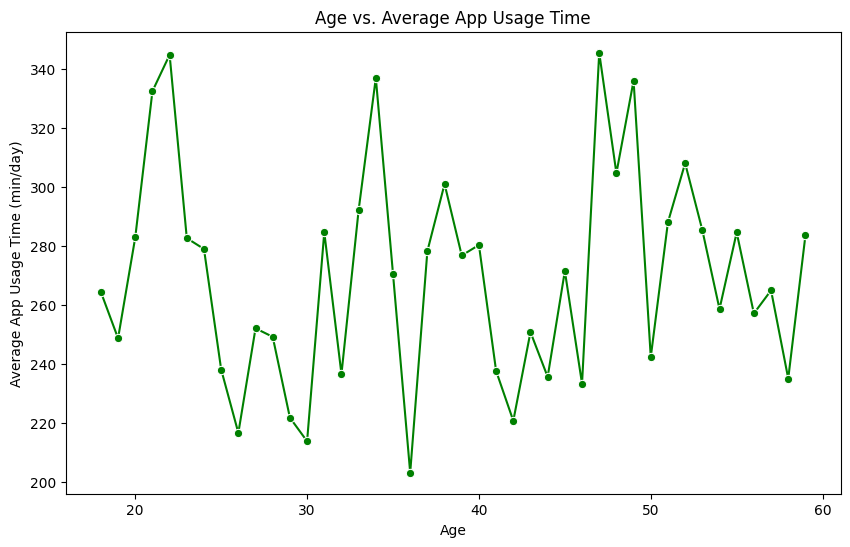

In [33]:
plt.figure(figsize=(10, 6))
age_usage = df.groupby('Age')['App Usage Time (min/day)'].mean().reset_index()
sns.lineplot(x='Age', y='App Usage Time (min/day)', data=age_usage, marker='o', color='green')
plt.title('Age vs. Average App Usage Time')
plt.xlabel('Age')
plt.ylabel('Average App Usage Time (min/day)')
plt.show()


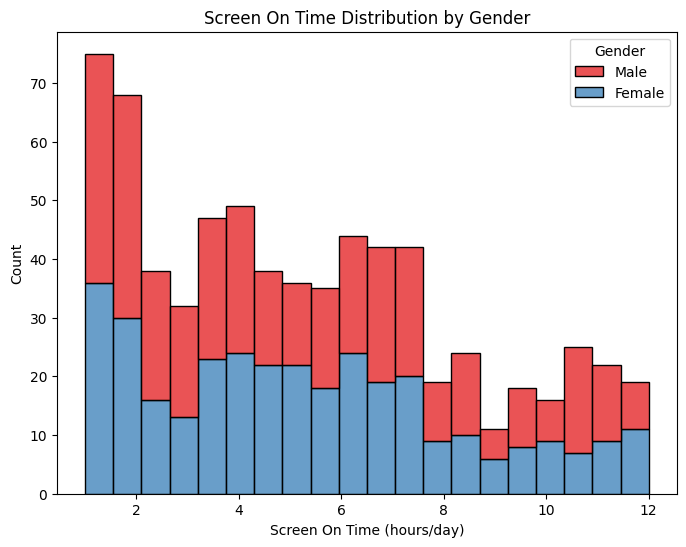

In [34]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Screen On Time (hours/day)', hue='Gender', multiple='stack', palette='Set1', bins=20)
plt.title('Screen On Time Distribution by Gender')
plt.xlabel('Screen On Time (hours/day)')
plt.ylabel('Count')
plt.show()


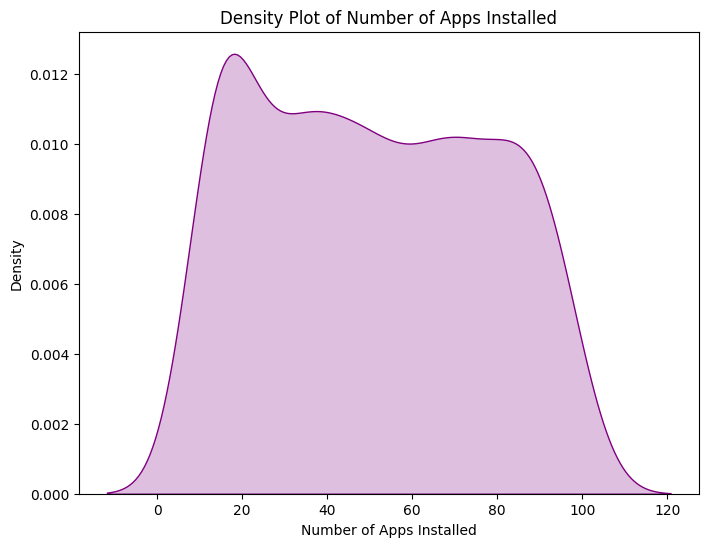

In [35]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='Number of Apps Installed', shade=True, color='purple')
plt.title('Density Plot of Number of Apps Installed')
plt.xlabel('Number of Apps Installed')
plt.ylabel('Density')
plt.show()


# <div style="text-align:center; padding:15px; color:white; margin:0; font-size:150%; font-family:'Times New Roman'; background-color:#6A0977; overflow:hidden"><b>Model For Classification of User Behavior</b></div>


Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        44
           3       1.00      1.00      1.00        43
           4       1.00      1.00      1.00        41
           5       1.00      1.00      1.00        41

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210

Confusion Matrix:
 [[41  0  0  0  0]
 [ 0 44  0  0  0]
 [ 0  0 43  0  0]
 [ 0  0  0 41  0]
 [ 0  0  0  0 41]]


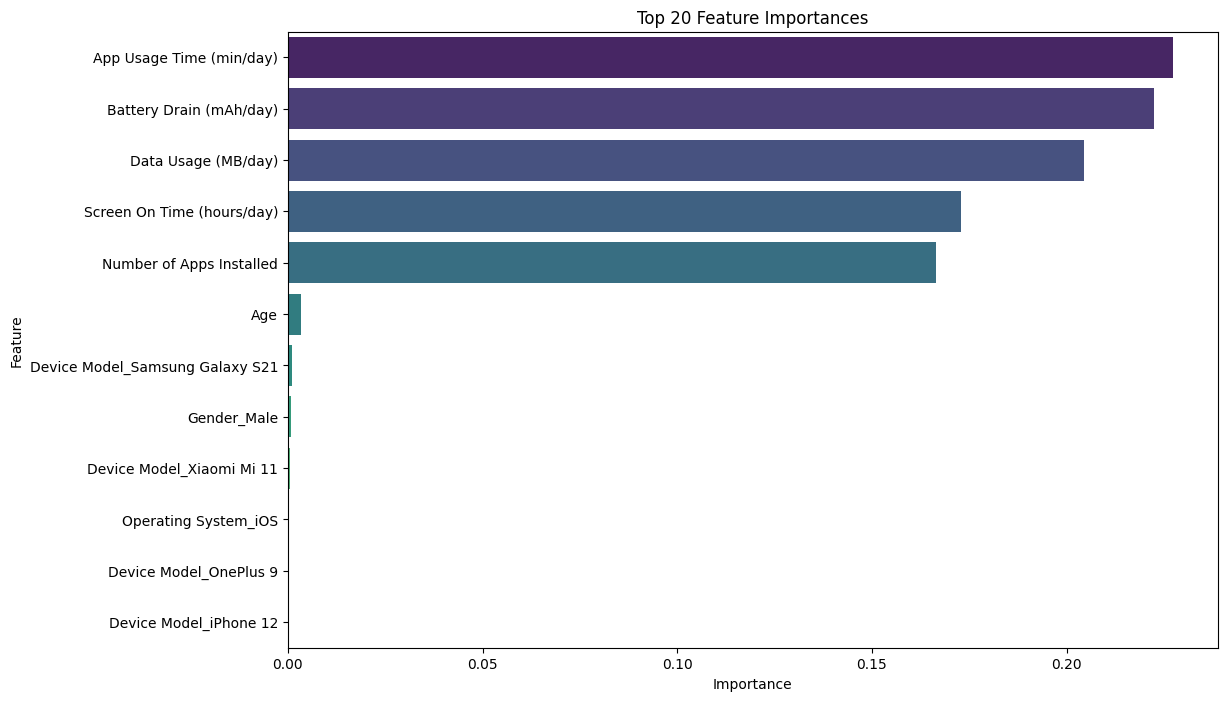

In [36]:
X = df.drop(['User ID', 'User Behavior Class'], axis=1)
y = df['User Behavior Class']


categorical_cols = ['Device Model', 'Operating System', 'Gender']
numerical_cols = ['App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Battery Drain (mAh/day)',
                  'Number of Apps Installed', 'Data Usage (MB/day)', 'Age']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)])


model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


if hasattr(model.named_steps['classifier'], 'feature_importances_'):
    
    ohe = model.named_steps['preprocessor'].named_transformers_['cat']
    feature_names = numerical_cols + list(ohe.get_feature_names_out(categorical_cols))
    
    importances = model.named_steps['classifier'].feature_importances_
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20), palette='viridis')
    plt.title('Top 20 Feature Importances')
    plt.show()


# <div style="text-align:center; padding:15px; color:white; margin:0; font-size:150%; font-family:'Times New Roman'; background-color:#6A0977; overflow:hidden"><b>Prediction of Battery Drain</b></div>


Mean Absolute Error (MAE): 148.95990476190477
Mean Squared Error (MSE): 31249.32521238095
Root Mean Squared Error (RMSE): 176.7747866987285
R-squared (R²): 0.9516723527485257


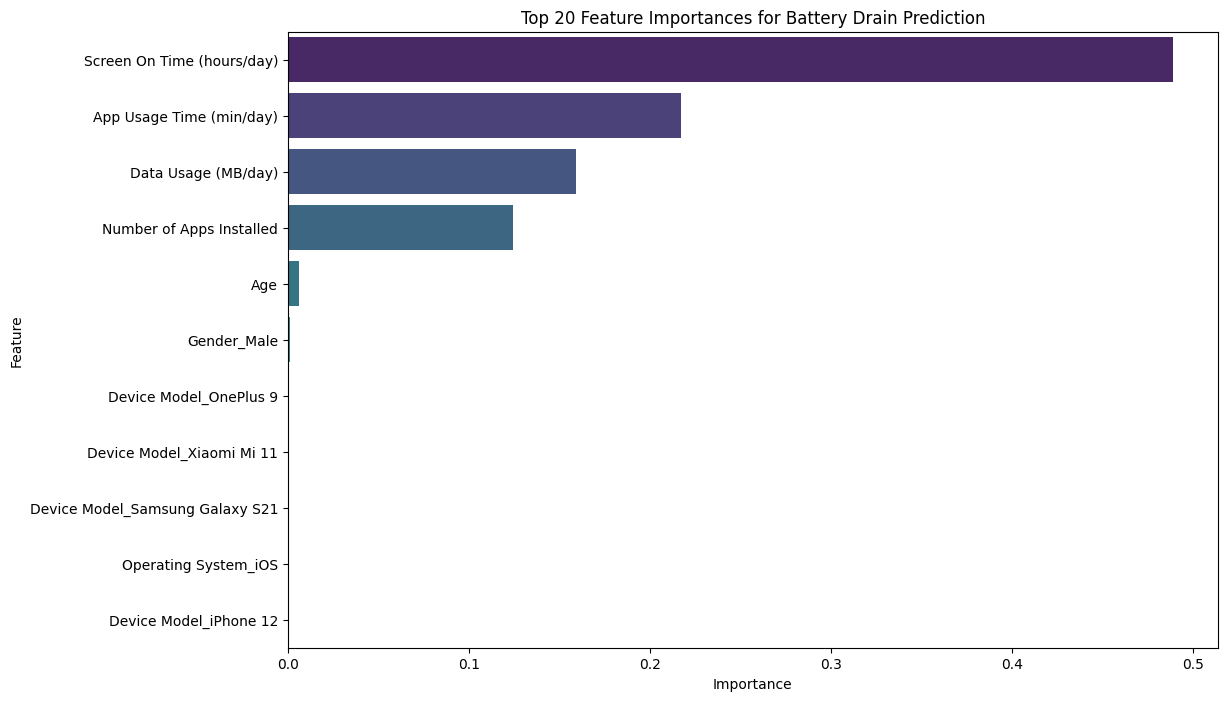

In [37]:
X = df.drop(['User ID', 'Battery Drain (mAh/day)'], axis=1)   
y = df['Battery Drain (mAh/day)']

categorical_cols = ['Device Model', 'Operating System', 'Gender']
numerical_cols = ['App Usage Time (min/day)', 'Screen On Time (hours/day)',
                  'Number of Apps Installed', 'Data Usage (MB/day)', 'Age']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)])


model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", mean_squared_error(y_test, y_pred, squared=False))
print("R-squared (R²):", r2_score(y_test, y_pred))

if hasattr(model.named_steps['regressor'], 'feature_importances_'):
   
    ohe = model.named_steps['preprocessor'].named_transformers_['cat']
    feature_names = numerical_cols + list(ohe.get_feature_names_out(categorical_cols))
    
    importances = model.named_steps['regressor'].feature_importances_
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20), palette='viridis')
    plt.title('Top 20 Feature Importances for Battery Drain Prediction')
    plt.show()


<p style="font-size:250%; font-weight:bold; color:black; text-align:center; margin-top:10px;">If you like my notebook, please upvote!</p>
